### Import Libs and shared

In [254]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import OperationStatusCodes
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
from msrest.authentication import CognitiveServicesCredentials

from array import array
import os
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import sys
import time
import json
import requests

'''
Authenticates your credentials and creates a client.
'''
subscription_key = "ab1b89ca2b7c450f9ccbafd9187e62cc"
endpoint = "https://cognitiveservicesactsoft.cognitiveservices.azure.com/"

computervision_client = ComputerVisionClient(endpoint, CognitiveServicesCredentials(subscription_key))

In [255]:
from io import BytesIO

def display_image(image_path):
    if 'http' in image_path:
        result = requests.get(image_path, stream=True)
        img = Image.open(BytesIO(result.content))
        # img = Image.open(requests.get(image_path, stream=True).raw)
    else:
        img = Image.open(image_path)

    fig, ax = plt.subplots()
    ax.imshow(img)
    return ax

### **OCR** Read

===== Read File - remote =====
The quick brown fox jumps
over the lazy dog!

End of Read File


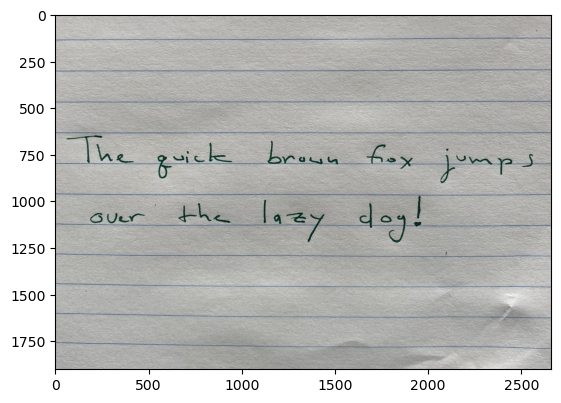

In [256]:
'''
OCR: Read File using the Read API, extract text - remote
This example will extract text in an image, then print results, line by line.
This API call can also extract handwriting style text (not shown).
'''
print("===== Read File - remote =====")
# Get an image with text
read_image_url = "https://raw.githubusercontent.com/MicrosoftDocs/azure-docs/master/articles/cognitive-services/Computer-vision/Images/readsample.jpg"

display_image(read_image_url)

# Call API with URL and raw response (allows you to get the operation location)
read_response = computervision_client.read(read_image_url,  raw=True)

# Get the operation location (URL with an ID at the end) from the response
read_operation_location = read_response.headers["Operation-Location"]
# Grab the ID from the URL
operation_id = read_operation_location.split("/")[-1]

# Call the "GET" API and wait for it to retrieve the results 
while True:
    read_result = computervision_client.get_read_result(operation_id)
    if read_result.status not in ['notStarted', 'running']:
        break
    time.sleep(1)

# Print the detected text, line by line
if read_result.status == OperationStatusCodes.succeeded:
    for text_result in read_result.analyze_result.read_results:
        for line in text_result.lines:
            print(line.text)
            # print(line.bounding_box)
print()
print("End of Read File")

### Image Analysis

#### Content tags

In [220]:
def detect_content_tags(image_path):
    display_image(image_path)

    '''
    This example returns a tag (key word) for each thing in the image.
    '''
    print("===== Tag an image - remote =====")
    # Call API with remote image
    if 'http' in image_path:
        tags_result_remote = computervision_client.tag_image(image_path)
    else:
        tags_result_remote = computervision_client.tag_image_in_stream(open(image_path, 'rb'))

    # Print results with confidence score
    print("Tags in the remote image: ")
    if (len(tags_result_remote.tags) == 0):
        print("No tags detected.")
    else:
        for tag in tags_result_remote.tags:
            print("'{}' with confidence {:.2f}%".format(tag.name, tag.confidence * 100))
    print()
    print("End of Tag an image")

===== Tag an image - remote =====
Tags in the remote image: 
'computer' with confidence 98.66%
'clothing' with confidence 96.96%
'laptop' with confidence 96.58%
'person' with confidence 95.36%
'indoor' with confidence 94.20%
'wall' with confidence 88.72%
'woman' with confidence 86.33%
'using' with confidence 56.04%

End of Tag an image


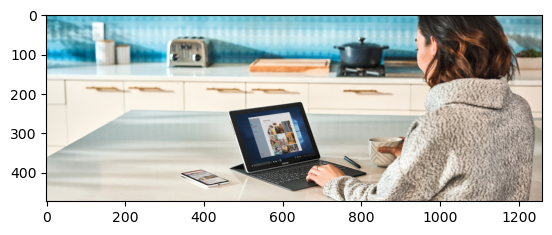

In [221]:
remote_image_url = "https://learn.microsoft.com/en-us/azure/cognitive-services/computer-vision/images/windows-kitchen.jpg"
detect_content_tags(remote_image_url)

===== Tag an image - remote =====
Tags in the remote image: 
'outdoor' with confidence 99.00%
'building' with confidence 98.81%
'sky' with confidence 98.21%
'stadium' with confidence 98.17%
'ancient rome' with confidence 96.16%
'ruins' with confidence 95.04%
'amphitheatre' with confidence 93.99%
'ancient roman architecture' with confidence 92.65%
'historic site' with confidence 89.55%
'ancient history' with confidence 89.54%
'history' with confidence 86.72%
'archaeological site' with confidence 84.41%
'travel' with confidence 65.85%
'large' with confidence 61.02%
'city' with confidence 56.57%

End of Tag an image


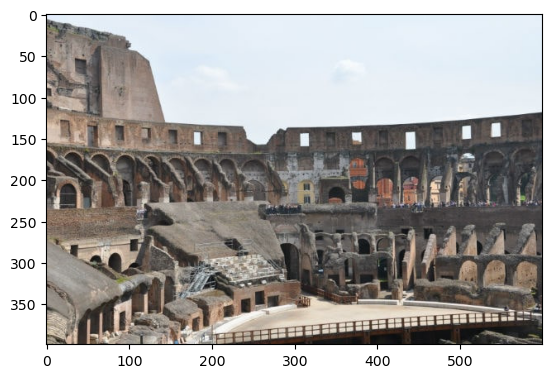

In [222]:
remote_image_url = "https://raw.githubusercontent.com/bxing2000/Data-Science/main/cognitive-services/images/landmark.jpg"
detect_content_tags(remote_image_url)

===== Tag an image - remote =====
Tags in the remote image: 
'human face' with confidence 99.78%
'person' with confidence 99.70%
'clothing' with confidence 99.52%
'smile' with confidence 97.23%
'sky' with confidence 93.23%
'woman' with confidence 92.91%
'portrait' with confidence 85.84%
'outdoor' with confidence 85.79%
'long hair' with confidence 84.16%
'girl' with confidence 78.81%
'wall' with confidence 72.94%
'standing' with confidence 57.93%

End of Tag an image


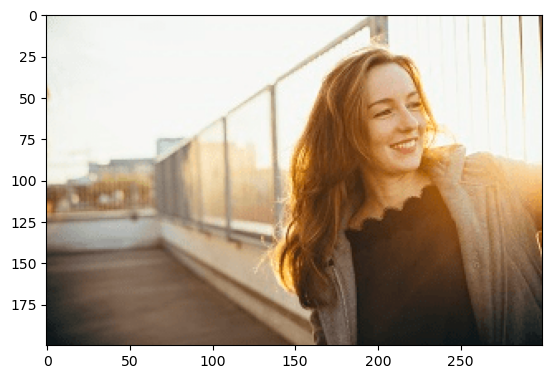

In [223]:
remote_image_url = "https://learn.microsoft.com/en-us/azure/cognitive-services/computer-vision/images/woman_roof.png"
detect_content_tags(remote_image_url)

===== Tag an image - remote =====
Tags in the remote image: 
'electronics' with confidence 99.69%
'keyboard' with confidence 98.29%
'computer' with confidence 96.20%
'office equipment' with confidence 95.37%
'input device' with confidence 94.92%
'computer keyboard' with confidence 94.27%
'peripheral' with confidence 92.78%
'computer component' with confidence 90.81%
'electronic device' with confidence 89.48%
'space bar' with confidence 87.45%
'text' with confidence 83.23%
'indoor' with confidence 80.60%
'lever' with confidence 80.09%

End of Tag an image


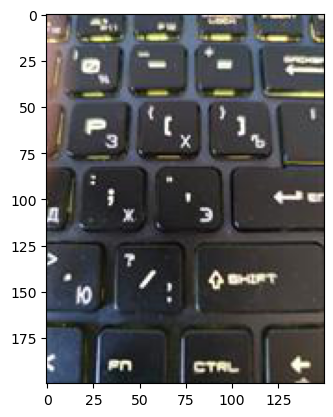

In [224]:
remote_image_url = "https://qaencorewfmplatform.actsoft.com/api/blobproxy/697-company-formdata-202208/1711276036/1711276037_medium/token/Uz8AAMkHcXM1"
detect_content_tags(remote_image_url)

===== Tag an image - remote =====
Tags in the remote image: 
'office equipment' with confidence 97.53%
'electronic device' with confidence 96.91%
'input device' with confidence 96.79%
'keyboard' with confidence 95.21%
'computer keyboard' with confidence 94.58%
'peripheral' with confidence 94.41%
'indoor' with confidence 94.32%
'space bar' with confidence 93.12%
'computer component' with confidence 92.20%
'office supplies' with confidence 90.51%
'lever' with confidence 89.07%
'computer' with confidence 88.20%
'gadget' with confidence 86.07%
'personal computer hardware' with confidence 84.02%
'numeric keypad' with confidence 84.02%
'floor' with confidence 56.08%
'mac' with confidence 42.49%

End of Tag an image


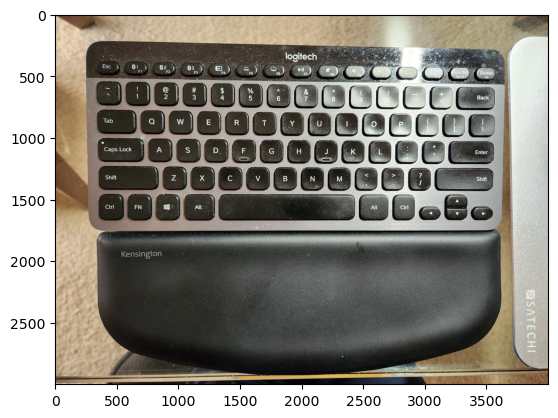

In [225]:
remote_image_url = 'images/keyboard.jpg'
detect_content_tags(remote_image_url)

===== Tag an image - remote =====
Tags in the remote image: 
'cup' with confidence 95.92%
'coffee' with confidence 95.55%
'coffee cup' with confidence 94.60%
'drinkware' with confidence 93.85%
'table' with confidence 91.44%
'indoor' with confidence 89.54%
'tableware' with confidence 89.24%
'serveware' with confidence 88.97%
'drink' with confidence 86.79%
'kitchenware' with confidence 84.82%
'furniture' with confidence 84.17%
'mug' with confidence 57.02%

End of Tag an image


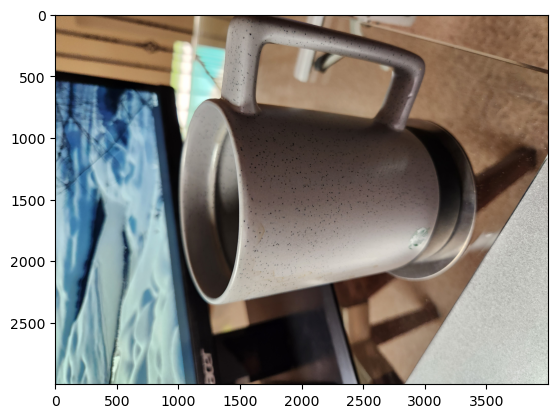

In [247]:
remote_image_url = 'images/cup.jpg'
detect_content_tags(remote_image_url)

#### Object detection

In [226]:
def detect_objects(image_path):
    '''
    This example returns an object (object_property, rectangle, parent and confidence) for each thing in the image.
    '''
    print("===== Detect objects - remote =====")
    if 'http' in image_path:
        objects_result_remote = computervision_client.detect_objects(image_path)
    else:
        objects_result_remote = computervision_client.detect_objects_in_stream(open(image_path, 'rb'))

    ax = display_image(image_path)

    if (len(objects_result_remote.objects) == 0):
        print("No objects detected.")
    else:
        for object in objects_result_remote.objects:
            # Create a Rectangle patch
            rect = patches.Rectangle((object.rectangle.x, object.rectangle.y), object.rectangle.w, object.rectangle.h, linewidth=2, edgecolor='r', facecolor='none')
            # Add the patch to the Axes
            ax.add_patch(rect)
            print("'{}' with confidence {:.2f}%".format(object.object_property, object.confidence * 100))

    print()
    print("End of Detect objects")

===== Detect objects - remote =====
'kitchen appliance' with confidence 50.10%
'computer keyboard' with confidence 51.00%
'Laptop' with confidence 85.00%
'person' with confidence 85.50%

End of Detect objects


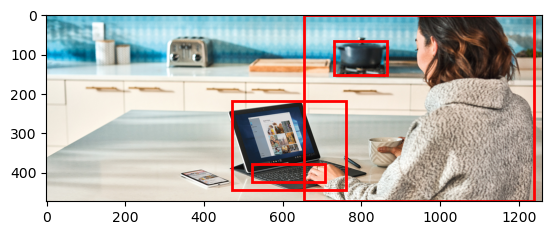

In [248]:
remote_image_url = "https://learn.microsoft.com/en-us/azure/cognitive-services/computer-vision/images/windows-kitchen.jpg"
detect_objects(remote_image_url)

===== Detect objects - remote =====
'person' with confidence 88.30%

End of Detect objects


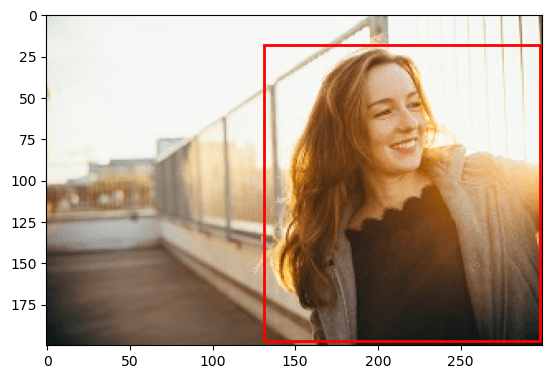

In [249]:
remote_image_url = "https://learn.microsoft.com/en-us/azure/cognitive-services/computer-vision/images/woman_roof.png"
detect_objects(remote_image_url)

===== Detect objects - remote =====
No objects detected.

End of Detect objects


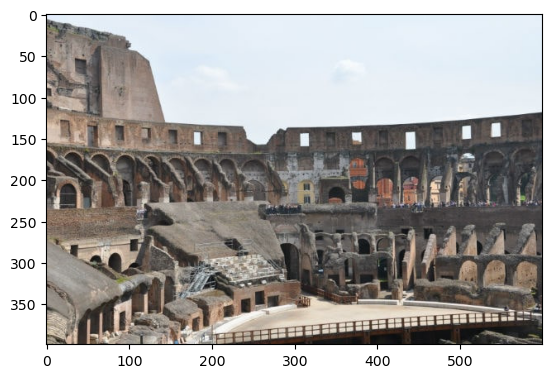

In [250]:
remote_image_url = "https://raw.githubusercontent.com/bxing2000/Data-Science/main/cognitive-services/images/landmark.jpg"
detect_objects(remote_image_url)

===== Detect objects - remote =====
No objects detected.

End of Detect objects


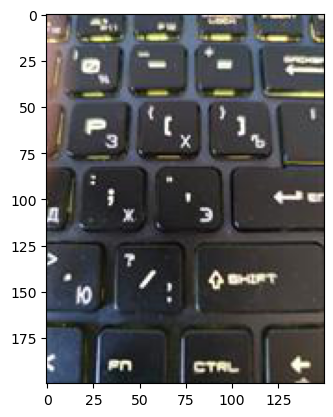

In [251]:
# remote_image_url = 'images/cab.jpg'
remote_image_url = "https://qaencorewfmplatform.actsoft.com/api/blobproxy/697-company-formdata-202208/1711276036/1711276037_medium/token/Uz8AAMkHcXM1"
detect_objects(remote_image_url)

===== Detect objects - remote =====
No objects detected.

End of Detect objects


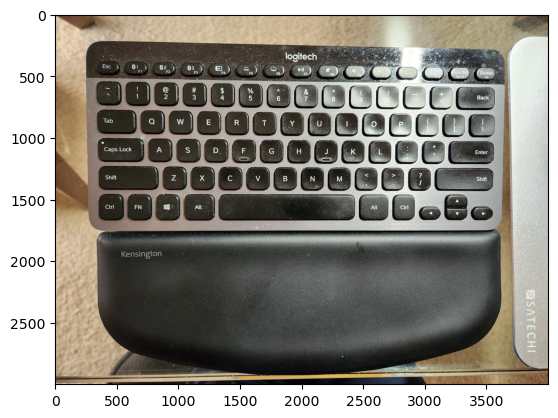

In [252]:
remote_image_url = 'images/keyboard.jpg'
detect_objects(remote_image_url)

===== Detect objects - remote =====
No objects detected.

End of Detect objects


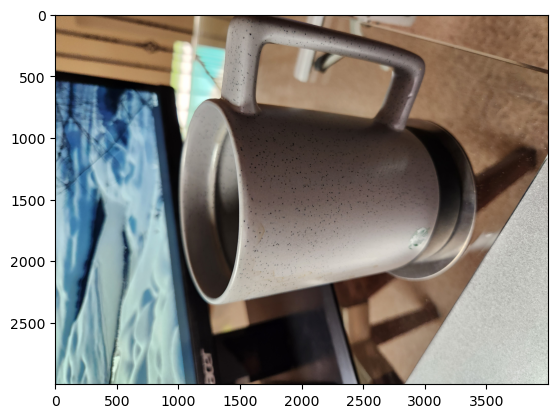

In [253]:
remote_image_url = 'images/cup.jpg'
detect_objects(remote_image_url)

#### Image categorization

In [232]:
def categorize_image(image_path):
    display_image(image_path)

    '''
    This example categorizes object for each thing in the image.
    '''
    print("===== categorize objects - remote =====")
    if 'http' in image_path:
        category_result_remote = computervision_client.analyze_image(url=image_path, visual_features=["categories"])
    else: 
        category_result_remote = computervision_client.analyze_image_in_stream(open(image_path), visual_features=["categories"])

    if (len(category_result_remote.categories) == 0):
        print("No objects detected.")
    else:
        for category in category_result_remote.categories:
            print(f"{category.name}: {category.score * 100:.2f}%")

    print()
    print("End of categorize objects")

===== categorize objects - remote =====
people_: 82.03%

End of categorize objects


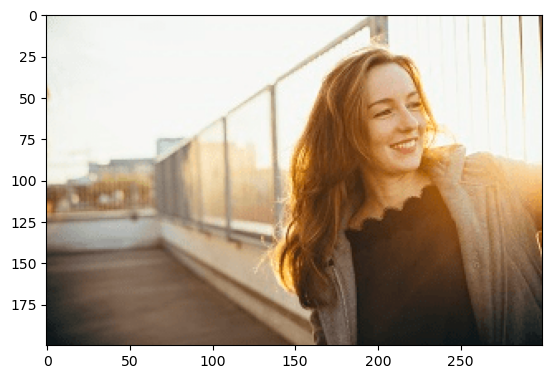

In [233]:
remote_image_url = "https://learn.microsoft.com/en-us/azure/cognitive-services/computer-vision/images/woman_roof.png"
categorize_image(remote_image_url)

===== categorize objects - remote =====
others_: 2.73%
object_screen: 90.23%

End of categorize objects


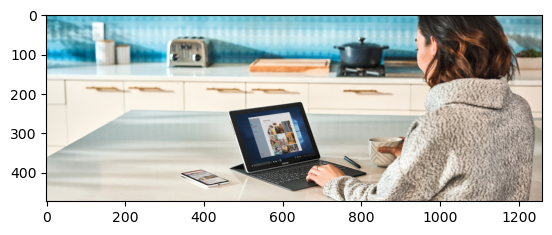

In [234]:
remote_image_url = "https://learn.microsoft.com/en-us/azure/cognitive-services/computer-vision/images/windows-kitchen.jpg"
categorize_image(remote_image_url)

===== categorize objects - remote =====
building_: 31.64%
others_: 0.39%
outdoor_: 3.91%

End of categorize objects


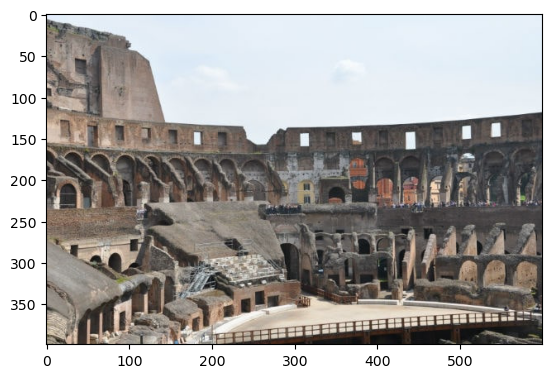

In [235]:
remote_image_url = "https://raw.githubusercontent.com/bxing2000/Data-Science/main/cognitive-services/images/landmark.jpg"
categorize_image(remote_image_url)

#### Face detection

In [236]:
def detect_faces(image_path):
    ax = display_image(image_path)
    if 'http' in image_path:
        faces_result = computervision_client.analyze_image(image_path, visual_features=["faces"])
    else:
        faces_result = computervision_client.analyze_image_in_stream(open(image_path, 'rb'), visual_features=["faces"])

    print("Faces:")
    if (len(faces_result.faces) == 0):
        print("No faces detected.")
    else:
        for face in faces_result.faces:
            # Create a Rectangle patch
            rect = patches.Rectangle((face.face_rectangle.left, face.face_rectangle.top), face.face_rectangle.width, face.face_rectangle.height, linewidth=2, edgecolor='red', facecolor='none')
            # Add the patch to the Axes
            ax.add_patch(rect)
            # print gender and age. In fact, api no longer provides those info.
            print("gender: {}, age: {}".format(face.gender, face.age))
    plt.show()

Faces:
gender: None, age: None
gender: None, age: None
gender: None, age: None
gender: None, age: None


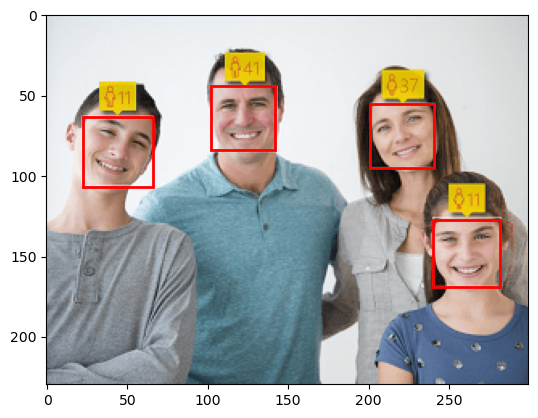

In [237]:
image_path = "https://learn.microsoft.com/en-us/azure/cognitive-services/computer-vision/images/family_photo_face.png"
detect_faces(image_path)

Faces:
No faces detected.


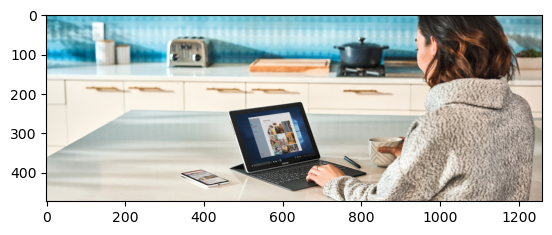

In [238]:
remote_image_url = "https://learn.microsoft.com/en-us/azure/cognitive-services/computer-vision/images/windows-kitchen.jpg"
detect_faces(remote_image_url)

#### Domain specific

In [239]:
models = computervision_client.list_models()

for x in models.models_property:
    print(x)

{'additional_properties': {}, 'name': 'celebrities', 'categories': ['people_', '人_', 'pessoas_', 'gente_']}
{'additional_properties': {}, 'name': 'landmarks', 'categories': ['outdoor_', '户外_', '屋外_', 'aoarlivre_', 'alairelibre_', 'building_', '建筑_', '建物_', 'edifício_']}


In [240]:
domain = "landmarks"
url = "https://raw.githubusercontent.com/bxing2000/Data-Science/main/cognitive-services/images/landmark.jpg"
language = "en"

analysis = computervision_client.analyze_image_by_domain(domain, url, language)

for landmark in analysis.result["landmarks"]:
    print('{} with confidence of {:.2f}%'.format(landmark["name"], landmark["confidence"] * 100))

Colosseum with confidence of 93.70%


### Image description

In [241]:
def describe_image(image_path):
    image = open(image_path, "rb")
    # Display the image
    display(Image.open(image_path).resize((412, 250)))
    # Call the API
    description_result = computervision_client.describe_image_in_stream(image)
    # Get the description with confidence level
    print("Description:")
    if (len(description_result.captions) == 0):
        print("No description detected.")
    else:
        for caption in description_result.captions:
            print(f"{caption.text} with confidence {caption.confidence * 100:.2f}%")

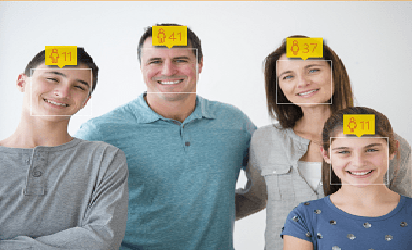

Description:
a group of people wearing yellow hats with confidence 38.67%


In [245]:
describe_image("images/family_photo_face.png")

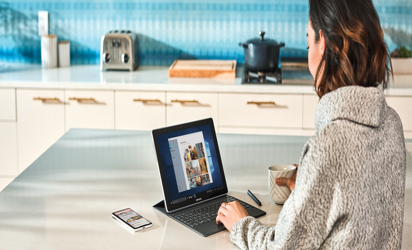

Description:
a person sitting at a table with a laptop and cell phone with confidence 50.61%


In [ ]:
describe_image("images/windows-kitchen.jpg")

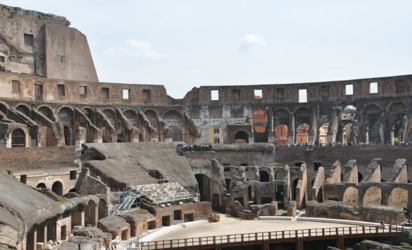

Description:
an ancient city with many ruins with Colosseum in the background with confidence 33.80%


In [ ]:
describe_image("images/landmark.jpg")

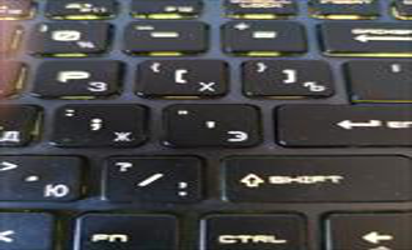

Description:
a close up of a keyboard with confidence 60.99%


In [243]:
describe_image("images/cab.jpg")

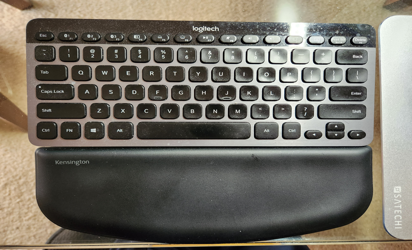

Description:
a black keyboard on a wooden surface with confidence 41.82%


In [244]:
describe_image('images/keyboard.jpg')